# Country Cutout Example

This example shows the users how to use earthkit-geo (https://earthkit-geo.readthedocs.io) to retrieve a country cutout using Polytope.

In [ ]:
import earthkit
import earthkit.plots
import earthkit.geo.cartography

countries = ["France", "Italy", "Spain"] # List of countries

shapes = earthkit.geo.cartography.country_polygons(countries, resolution=50e6)

request = { "class": "od", "stream" : "oper", "type" : "fc", "levtype" : "sfc",
    "date" : 0,
    "time" : 0,
    "expver" : 1,
    "param" : [ 167 ],
    "step": 0,
    "feature": {
        "type": "polygon",
        "shape": shapes,
    },
}

ds = earthkit.data.from_source("polytope", "ecmwf-mars", request, stream=False, address='polytope.ecmwf.int')

The collection being accessed is `ecmwf-mars`. The endpoint being accessed is `polytope.ecmwf.int`. Earthkit-geo is used to return the shape of the requested countries.

A user can also convert the data to xarray in the following way:

In [4]:
xa = ds.to_xarray()
xa

<xarray.Dataset> Size: 637kB
Dimensions:    (datetimes: 1, number: 1, steps: 1, points: 15914)
Coordinates:
  * datetimes  (datetimes) <U20 80B '2024-11-22T00:00:00Z'
  * number     (number) int64 8B 0
  * steps      (steps) int64 8B 0
  * points     (points) int64 127kB 0 1 2 3 4 ... 15909 15910 15911 15912 15913
    x          (points) float64 127kB 27.66 27.73 27.73 27.8 ... 51.0 51.0 51.0
    y          (points) float64 127kB 342.0 341.9 342.0 ... 2.093 2.254 2.415
    z          (points) float64 127kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Data variables:
    2t         (datetimes, number, steps, points) float64 127kB 292.9 ... 276.4
Attributes:
    class:          od
    Forecast date:  2024-11-22T00:00:00Z
    domain:         g
    expver:         0001
    levtype:        sfc
    step:           0
    stream:         oper
    type:           fc
    number:         0
    date:           2024-11-22T00:00:00Z

## Visualise

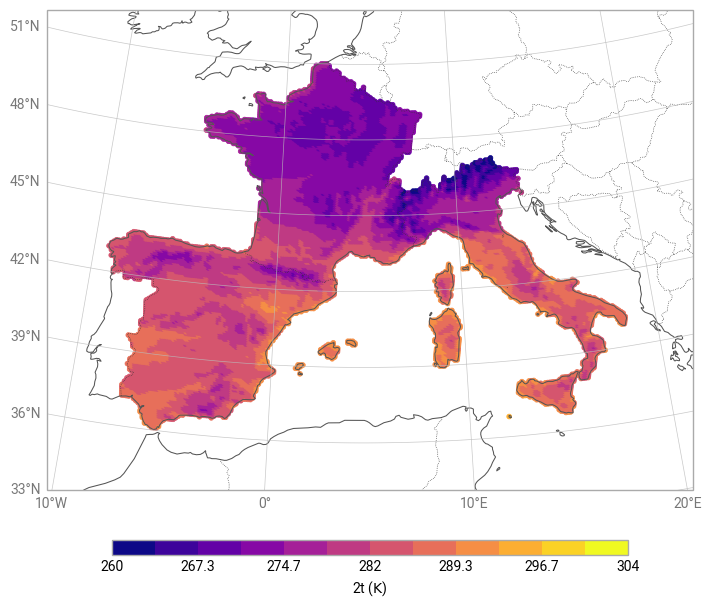

In [5]:
chart = earthkit.plots.Map(domain=countries)
chart.point_cloud(xa['2t'], x="y", y="x")
chart.coastlines()
chart.borders()
chart.gridlines()
chart.legend()
chart.show()